# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots. 

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
- first
- second
- third


1- Lee, Rena A. </br>
2- Dai, Fei search</br>
3- Howard, Andrew W.

How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
- answer

Explore one of these position reference papers. What was the purpose of their survey?
   
<p>The aim of this paper is to report the discovery of a substellar companion to a young M6 star (2MASS J02192210–3925225), a member of the Tucana-Horologium association.

   <p> Bu makalenin amacı, Tucana-Horologium birliğinin bir üyesi olan genç bir M6 yıldızının (2MASS J02192210–3925225) bir alt yıldız arkadaşının keşfini bildirmektir.

*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [5]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations
import seaborn as sns
# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [6]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

dir = ''  # replace with your actual data directory
file = 'PSCompPars_2025.07.26_14.18.25.csv' # replace with your actual data file name
path = os.path.join(dir, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,pl_name,hostname,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,rv_flag,tran_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,Gaia DR2 3946945413106333696,2,1,Radial Velocity,2007,Xinglong Station,1,0,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,Gaia DR2 1696798367260229376,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,1,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,Gaia DR2 1920113512486282240,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1,0,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,Gaia DR2 1385293808145621504,1,2,Radial Velocity,2002,W. M. Keck Observatory,1,0,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,Gaia DR2 2135550755683407232,3,1,Radial Velocity,1996,Multiple Observatories,1,0,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,ups And b,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1996,Lick Observatory,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5929,ups And c,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5930,ups And d,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5931,ups Leo b,ups Leo,Gaia DR2 3794167001116433152,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,1,0,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [7]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['pl_name', 'hostname', 'gaia_id', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'tran_flag',
       'micro_flag', 'etv_flag', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_ma

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,pl_name,hostname,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,rv_flag,tran_flag,micro_flag,etv_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,Gaia DR2 3946945413106333696,2,1,Radial Velocity,2007,Xinglong Station,1,0,0,0,0,323.21000,0.06000,-0.05000,0.0,1.178,0.000,0.00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.464,0.123,-0.125,0.0,Msini,0.238,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.0,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.45,0.08,-0.08,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,Gaia DR2 1696798367260229376,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,1,0,0,0,0,516.21997,3.20000,-3.20000,0.0,1.530,0.070,-0.07,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.740,2.500,-2.500,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,Gaia DR2 1920113512486282240,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1,0,0,0,0,186.76000,0.11000,-0.12000,0.0,0.775,0.000,0.00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.559,0.114,-0.122,0.0,Msini,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.0,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.55,0.06,-0.07,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.7140,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,Gaia DR2 1385293808145621504,1,2,Radial Velocity,2002,W. M. Keck Observatory,1,0,0,0,0,1765.03890,1.67709,-1.87256,0.0,2.774,0.109,-0.12,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.053,1.632,-0.883,0.0,Mass,0.373,0.008,-0.006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0V,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.45,0.02,-0.02,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.0073,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,Gaia DR2 2135550755683407232,3,1,Radial Velocity,1996,Multiple Observatories,1,0,0,0,0,798.50000,1.00000,-1.00000,0.0,1.660,0.030,-0.03,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.780,0.080,-0.080,0.0,Msini,0.680,0.020,-0.020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.0,8.0,-8.0,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.36,0.01,-0.01,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.0110,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [10]:
df.shape

(5933, 89)

In [11]:
# How many planets are in the table?
# code here

In [12]:
df["pl_name"].nunique()

5933

In [13]:
# How many discovery facilities are listed in the table?
# code here

In [14]:
df["disc_facility"].nunique()

72

### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

Text(0, 0.5, 'Mass (Jupiter Masses)')

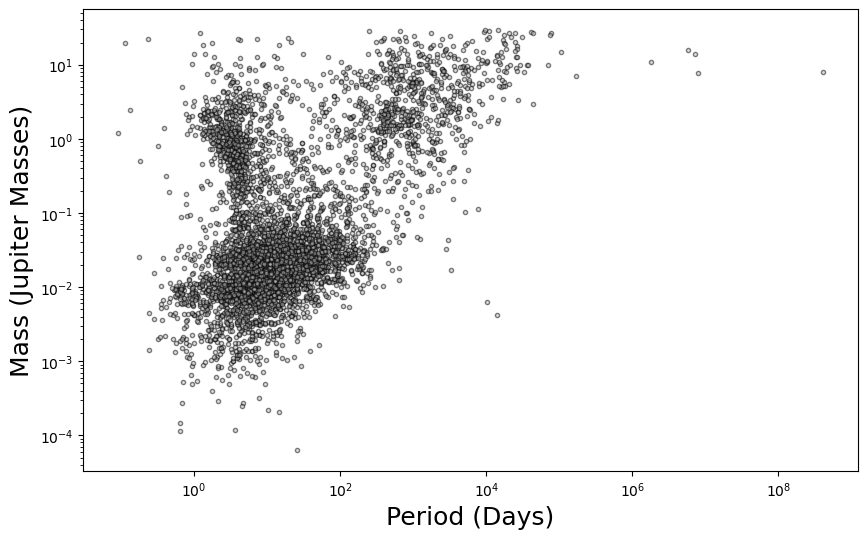

In [16]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses) 

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame. 
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)


The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

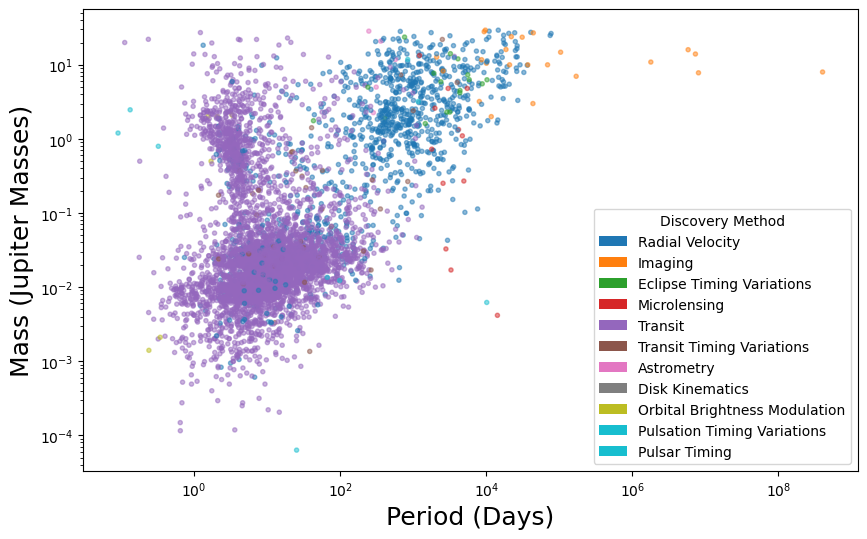

In [18]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

In [20]:
# code here

Text(0.5, 1.0, 'Scatter Plot of Discovery Methods by Year')

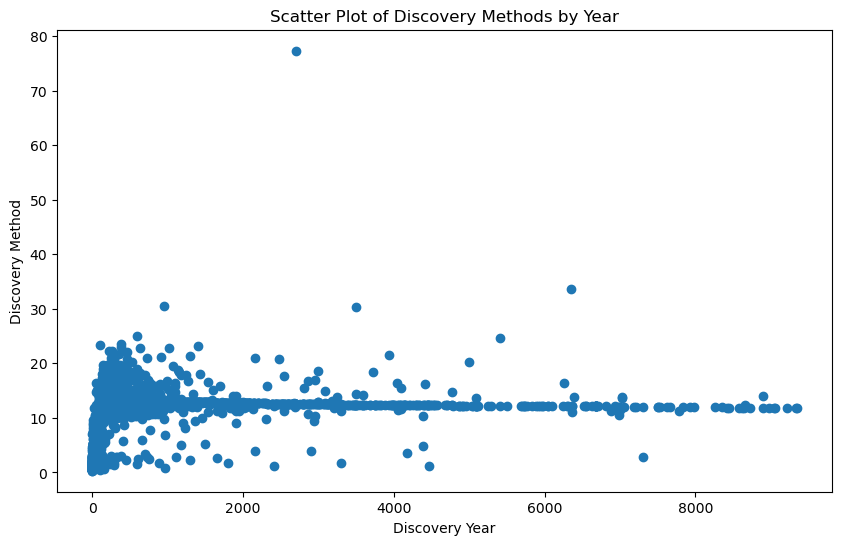

In [21]:
plt.figure(figsize=(10, 6))

# Renkleri belirle

plt.scatter(df["pl_bmasse"], df["pl_rade"])

# Eksen etiketleri
plt.xlabel('Discovery Year')
plt.ylabel('Discovery Method')
plt.title('Scatter Plot of Discovery Methods by Year')

### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [23]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
# code here
print(tess_planets.pl_name.nunique())
print(kepler_planets.pl_name.nunique())

643
2784


Let's compare the different planet populations discovered by Kepler and by TESS. 

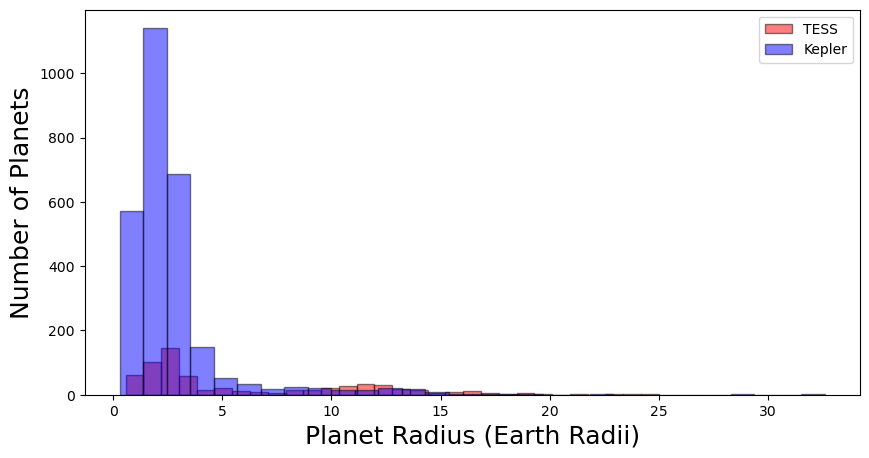

In [25]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

In [27]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(20), 80) 

# finish on your own

<Figure size 1000x500 with 0 Axes>

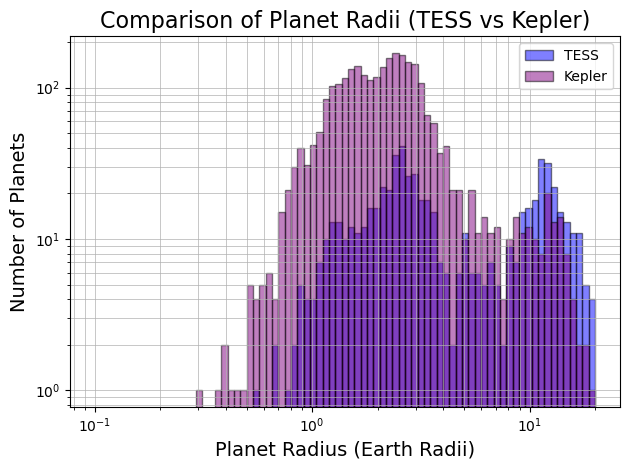

In [28]:

plt.hist(tess_planets['pl_rade'].dropna(), bins=bins, alpha=0.5, label='TESS', color='blue', edgecolor='black')
plt.hist(kepler_planets['pl_rade'].dropna(), bins=bins, alpha=0.5, label='Kepler', color='purple', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)', fontsize=14)
plt.ylabel('Number of Planets', fontsize=14)
plt.title('Comparison of Planet Radii (TESS vs Kepler)', fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True, which="both", ls="-", linewidth=0.5)

plt.tight_layout()
plt.show()

What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

In [30]:
# code here

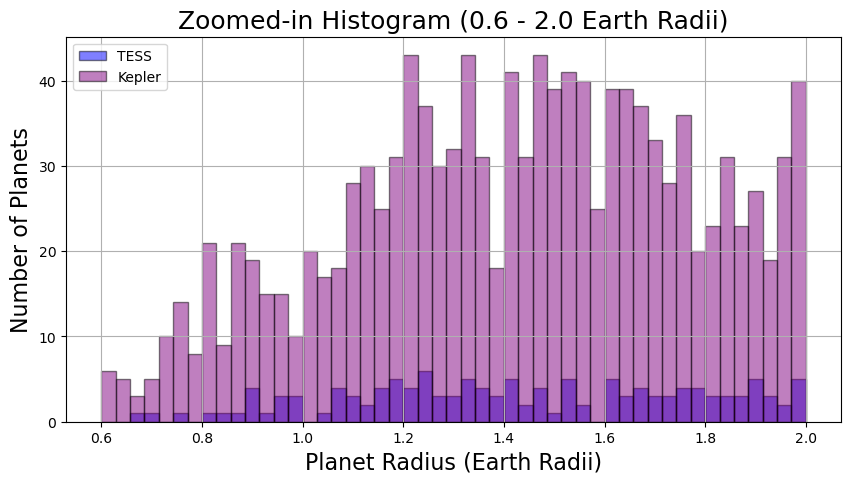

In [31]:
plt.figure(figsize=(10, 5))

zoom_bins = np.linspace(0.6, 2.0, 50)

plt.hist(tess_planets['pl_rade'], bins=zoom_bins, alpha=0.5, label='TESS', color='blue', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=zoom_bins, alpha=0.5, label='Kepler', color='purple', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)', fontsize=16)
plt.ylabel('Number of Planets', fontsize=16)
plt.title('Zoomed-in Histogram (0.6 - 2.0 Earth Radii)', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [33]:
# create a mask for planets discovered by the Radial Velocity method

radial_velocity_count = len(df[df['discoverymethod'] == 'Radial Velocity'])
print('Number of planets discovered using the Radial Velocity method:', radial_velocity_count)



# find the furthest confirmed exoplanet

confirmed = df[df['sy_dist'].notna()]

furthest_planet = confirmed.loc[confirmed['sy_dist'].idxmax()]
print(f"the furthest planet: {furthest_planet['pl_name']}")
print(f"distance of the planet: {furthest_planet['sy_dist']} parsec")



# count the number of planets smaller than Earth


smaller_than_earth_count = len(df[df['pl_rade'] < 1])  
print(f'Number of planets smaller than Earth: {smaller_than_earth_count}')


Number of planets discovered using the Radial Velocity method: 1128
the furthest planet: SWEEPS-11 b
distance of the planet: 8500.0 parsec
Number of planets smaller than Earth: 224


Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN). 

In [35]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()
selected_planets = df[mass_mask]

# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)

radius_mask = selected_planets['pl_rade'].notna()  
selected_planets_with_radius = selected_planets[radius_mask]

# how many planets were discovered by the Radial Velocity method?

radial_velocity_count = len(df[df['discoverymethod'] == 'Radial Velocity'])
print("Number of planets discovered by the Radial Velocity method:", radial_velocity_count)

# how many of those have planet radius measurements?

radial_velocity_mask = df['discoverymethod'] == 'Radial Velocity'
radius_measurements_count = len(df[radial_velocity_mask & df['pl_rade'].notna()])
print('Number of Radial Velocity planets with radius measurements:', radius_measurements_count)

Number of planets discovered by the Radial Velocity method: 1128
Number of Radial Velocity planets with radius measurements: 1118


Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [46]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

In [48]:
# calculate density in g/cm^3


# create a scatter plot of Density (g/cm^3) vs Planet Radius (Earth Radii)


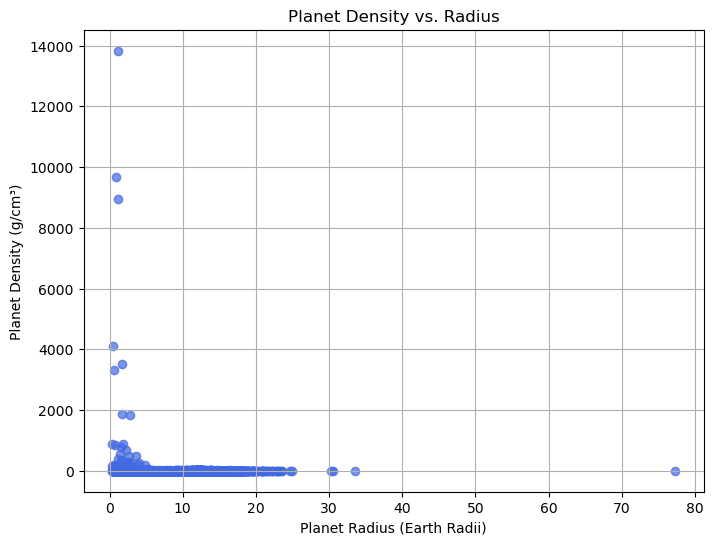

In [56]:
volume_cm3 = (4/3) * np.pi * rad_cm**3
density = mass_g / volume_cm3

plt.figure(figsize=(8, 6))
plt.scatter(selected_planets['pl_rade'], density, alpha=0.7, color='royalblue')

plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Density (g/cm³)')
plt.title('Planet Density vs. Radius')
plt.grid(True)


### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot. 

In [58]:
# code here

In [60]:
df["discoverymethod"].value_counts()

discoverymethod
Transit                          4395
Radial Velocity                  1128
Microlensing                      247
Imaging                            83
Transit Timing Variations          38
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          5
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

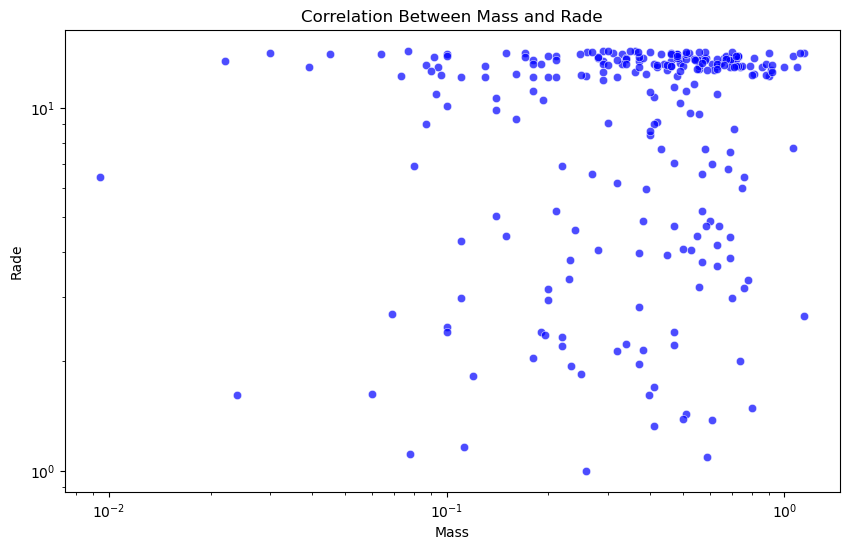

In [80]:
radial_velocity_planets = df[df['discoverymethod'] == 'Microlensing']

radial_velocity_planets = radial_velocity_planets.dropna(subset=['st_mass', 'pl_rade'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=radial_velocity_planets, x='st_mass', y='pl_rade', color='blue', alpha=0.7)

plt.title('Correlation Between Mass and Rade')
plt.xlabel('Mass')
plt.ylabel('Rade')

plt.xscale('log')
plt.yscale('log')
plt.show()